In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

#links
- https://github.com/maxbolger/nflfastR-Python-Tutorial
- https://github.com/maxbolger/nflfastR-Python-Tutorial/blob/main/nflfastR_python_tutorial.ipynb

- https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e

In [2]:
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [3]:
#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [4]:
data = load_data(2021)

In [5]:
data.head()
data.game_id.unique().size

285

In [28]:
data['epa_isnull'] = data['epa'].isnull()
# .groupby(['epa', 'play_type'])['play_type'].isnull()
data.groupby(['epa_isnull', 'play_type'], dropna=False)['play_type'].count()
# data['epa_isnull'].sum()
# data.loc[data['epa_isnull']==True, 'play_type']
# data.play_type.value_counts().sum() - data.shape[0]

epa_isnull  play_type  
False       extra_point     1321
            field_goal      1076
            kickoff         2912
            no_play         4718
            pass           21010
            punt            2187
            qb_kneel         408
            qb_spike          74
            run            14756
            NaN                0
True        NaN                0
Name: play_type, dtype: int64

In [39]:
type(data.epa[0])
# data.epa[0].isnull()
data.loc[data.epa.isnull(), 'epa'].value_counts(dropna=False)

NaN    855
Name: epa, dtype: int64

In [27]:
data.loc[data.play_type.isnull(), 'epa']

0        NaN
45      -0.0
79      -0.0
100      NaN
151     -0.0
        ... 
50620    NaN
50651   -0.0
50660   -0.0
50693   -0.0
50711    NaN
Name: epa, Length: 2250, dtype: float64

==========================}

In [ ]:
# data = load_multi_years(True)
# data.shape

In [8]:
#use os to look for patterns of file
# os.listdir(root)
# data = [file for file in os.listdir(root) if 'play_by_play' in file]
# data

['play_by_play_1999.csv.gz',
 'play_by_play_2000.csv.gz',
 'play_by_play_2001.csv.gz',
 'play_by_play_2002.csv.gz',
 'play_by_play_2003.csv.gz',
 'play_by_play_2004.csv.gz',
 'play_by_play_2005.csv.gz',
 'play_by_play_2006.csv.gz',
 'play_by_play_2007.csv.gz',
 'play_by_play_2008.csv.gz',
 'play_by_play_2009.csv.gz',
 'play_by_play_2010.csv.gz',
 'play_by_play_2011.csv.gz',
 'play_by_play_2012.csv.gz',
 'play_by_play_2013.csv.gz',
 'play_by_play_2014.csv.gz',
 'play_by_play_2015.csv.gz',
 'play_by_play_2016.csv.gz',
 'play_by_play_2017.csv.gz',
 'play_by_play_2018.csv.gz',
 'play_by_play_2019.csv.gz',
 'play_by_play_2020.csv.gz']

In [4]:
#data from 1999 to current year
# for i in range(1999, 2000):
#     download_and_store_data(i)
#     print(f"Play by play year {i} has been downloaded and stored.")

In [4]:
#download data for the most recent week
download_and_store_data(2021)
#load downlaoded data
data = load_data(2021)

In [5]:
# data
#view unique games in loaded file
data.shape
data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0,-1.242206,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129545
50708,3951,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50709,3968,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0,-0.569208,0.263600,4.354299,2.0,0.998861,0.998861,0.747601,25.239891
50710,3990,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,LA,away,CIN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data['game_id'].unique()
#view games by week
w6 = data[data.week==6]
data[data.week==6]['game_id'].unique()
def game_played_week(week_number, game_data):
    """return an array of games played in a chosen week"""
    return data[data.week==6]['game_id'].unique()
#choose a game
def choose_game(teams, by_week=None):
    """return a dataframe of game data either by week or by home-away status"""
    #if week is specified then home-away status doesn't matter
    if by_week:
        week_number = by_week
    week_data = data[data.week==week_number]
    teams = [home_team, away_team]
    week_data['home_team'.isin(teams)]
    return



In [25]:
w6[w6['home_team'].isin(['PHI', 'TB'])]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
16559,1,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16560,40,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16561,55,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,-0.000974,NaN,NaN,NaN,NaN,NaN,0.503827,-50.382656
16562,76,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,0.864458,0.337553,3.996983,2.0,0.996264,0.982757,0.621553,37.844706
16563,100,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,1.643244,0.354908,4.619678,2.0,1.000000,1.000000,0.490222,50.977755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,3885,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,NaN,NaN,NaN,...,0,0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16722,3902,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,-0.798304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16723,3923,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,-0.963271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16724,3944,2021_06_TB_PHI,2021101400,PHI,TB,REG,6,TB,away,PHI,...,0,0,-3.088155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#2021-10-18, Mon
#game with most interceptions
#for each game, select game data, sum the boolean column interception
w6.groupby(['game_id'])['interception'].sum()
#LA-NYG has the most interception in week 6 with 5
# which team gets inrcepted in each game
w6.groupby(['game_id', 'posteam'])['interception'].sum()
# 
#more granular: passers who were intercepted
# w6.groupby(['game_id', 'posteam', 'passer_id', 'name'])['interception'].sum()
#A: groupby posteam, sum interception.
#does the number of interception affect how many points a team scores?

# does the number of passses intercepted by opposing team predictive of final result?

#calculate new column: win/tie/lose. If 1, home team win. 0: a tie, -1:away team wins


game_id          posteam
2021_06_ARI_CLE  ARI        0.0
                 CLE        1.0
2021_06_CIN_DET  CIN        1.0
                 DET        1.0
2021_06_DAL_NE   DAL        1.0
                 NE         1.0
2021_06_GB_CHI   CHI        1.0
                 GB         0.0
2021_06_HOU_IND  HOU        2.0
                 IND        0.0
2021_06_KC_WAS   KC         2.0
                 WAS        1.0
2021_06_LAC_BAL  BAL        2.0
                 LAC        1.0
2021_06_LA_NYG   LA         2.0
                 NYG        3.0
2021_06_LV_DEN   DEN        3.0
                 LV         0.0
2021_06_MIA_JAX  JAX        0.0
                 MIA        1.0
2021_06_MIN_CAR  CAR        1.0
                 MIN        0.0
2021_06_SEA_PIT  PIT        0.0
                 SEA        0.0
2021_06_TB_PHI   PHI        1.0
                 TB         1.0
Name: interception, dtype: float64

In [45]:
w6[['game_id', 'result']]
# w6.groupby('Group_Id').apply(lambda x: x.sample(1)).reset_index(drop=True)
w6.groupby('game_id').apply(lambda x: x.iloc[-1, :])['result']
# is 'result' unique for all rows of each match?
# w6.groupby('game_id')['result'].unique() # yes, result here means final result
# w6.groupby('game_id')['interception'].unique() # multiple results

game_id
2021_06_ARI_CLE    [nan, 0.0, 1.0]
2021_06_CIN_DET    [nan, 0.0, 1.0]
2021_06_DAL_NE     [nan, 0.0, 1.0]
2021_06_GB_CHI     [nan, 0.0, 1.0]
2021_06_HOU_IND    [nan, 0.0, 1.0]
2021_06_KC_WAS     [nan, 0.0, 1.0]
2021_06_LAC_BAL    [nan, 0.0, 1.0]
2021_06_LA_NYG     [nan, 0.0, 1.0]
2021_06_LV_DEN     [nan, 0.0, 1.0]
2021_06_MIA_JAX    [nan, 0.0, 1.0]
2021_06_MIN_CAR    [nan, 0.0, 1.0]
2021_06_SEA_PIT         [nan, 0.0]
2021_06_TB_PHI     [nan, 0.0, 1.0]
Name: interception, dtype: object

In [56]:
sample = data.groupby('game_id').apply(lambda x: x.iloc[-1, :])#['result']
home_wins = sum((sample.home_team == 'ARI') & (sample['result']>0))
away_wins = sum((sample.away_team == 'ARI') & (sample['result']<0))
home_wins + away_wins
# (sample['home_team']=='ARI')
def calculate_wins(team):
    """return the number of wins of a team"""
    home_wins = sum((sample.home_team == team) & (sample['result']>0))
    away_wins = sum((sample.away_team == team) & (sample['result']<0))
    return home_wins + away_wins

def calculate_tie(team):
    """return the number of ties of a team"""
    home_ties = sum((sample.home_team == team) & (sample['result']==0))
    away_ties = sum((sample.away_team == team) & (sample['result']==0))
    return home_wins + away_ties


6

game_id
2021_01_ARI_TEN    False
2021_01_BAL_LV     False
2021_01_CHI_LA     False
2021_01_CLE_KC     False
2021_01_DAL_TB     False
                   ...  
2021_06_LV_DEN     False
2021_06_MIA_JAX    False
2021_06_MIN_CAR    False
2021_06_SEA_PIT    False
2021_06_TB_PHI     False
Length: 93, dtype: bool

In [30]:
w6['series_result'].unique()
#pick one row (first row, random row for each groupby)

array(['Punt', 'First down', 'Touchdown', 'Turnover on downs', 'Turnover',
       'Field goal', 'QB kneel', 'Missed field goal', 'Opp touchdown',
       'End of half'], dtype=object)

In [8]:
#view what games are stored
data.game_id.unique().size
#15 games have data
#see which teams haven't played
#list of 32 teams
#complement of this list and the list of 30 temas that have played
#which QBs play the best this week


17

In [4]:
data = load_data(2020)

In [34]:
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 100)

In [30]:
# data.season_type.value_counts()
# data.play_type.value_counts()

pass           19160
run            13412
no_play         4111
kickoff         2748
punt            1894
extra_point     1319
field_goal       960
qb_kneel         417
qb_spike          84
Name: play_type, dtype: int64

In [7]:
#CLEAN DATA

#only use regular season data
data = data.loc[data.season_type =='REG']
# remove kickoffs, field goals, kneel downs... Limited to passes, runs, play with penalties
data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]
#change paly_type to match play call. QB scrambles are in fact pass plays, not run plays
data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'
#in-place reset index again
data.reset_index(drop=True, inplace=True)

In [8]:
data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
1,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
2,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
3,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
4,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,4455,2021_02_NYG_WAS,2021091600,WAS,NYG,REG,2,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,4472,2021_02_NYG_WAS,2021091600,WAS,NYG,REG,2,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,4489,2021_02_NYG_WAS,2021091600,WAS,NYG,REG,2,WAS,home,NYG,...,1,1,0.746418,0.823755,3.857020,2.0,0.649666,0.649666,0.956805,4.319465
2499,4518,2021_02_NYG_WAS,2021091600,WAS,NYG,REG,2,WAS,home,NYG,...,0,1,0.045338,0.306784,3.676144,2.0,0.998040,0.327515,0.938250,6.175029


1.3333333333333333

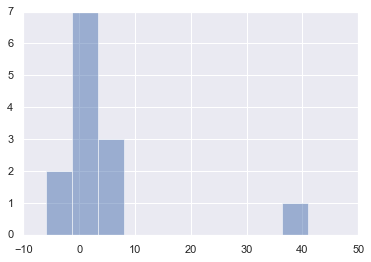

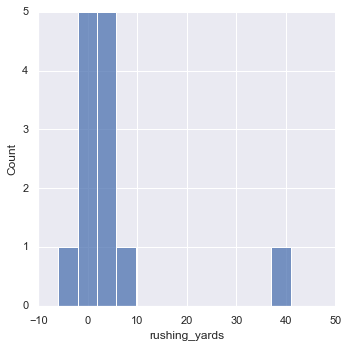

In [41]:
#2021-09-18, Sat
# Is Saquon Barkley a big yardage rusher aka guy whose few big runs make up a big portion of his rushing yards

#choose game
game = '2021_02_NYG_WAS'
game_data = data[data.game_id==game]
game_data
#see rushing yards
rusher = game_data[game_data.rushing_yards>0]
#groupby posteam and rusher
game_data.groupby(['posteam', 'rusher'])['rushing_yards'].count()
barkley = game_data.loc[(game_data.rusher=='S.Barkley')  & (game_data.posteam=='NYG')]
barkley = barkley['rushing_yards']
barkley
plt.hist(barkley, alpha=0.5);
# sns.kdeplot(barkley)
# sns.histplot(barkley)
sns.displot(barkley)
barkley.mean() #4.38 yards per rush
#take out the best rush then what
sorted_barkley = barkley.sort_values()
sorted_barkley[:-1].mean() #take out the best rush and barkley's average dropped to 1.33 ypr lol
# game_data.groupby(['posteam', 'rusher'])['rushing_yards'].agg({'rushing_yards':'sum', 
#                                                         'rushing_yards':'count',})
#                                                         'epa':'sum'})
# game_data.groupby(['rusher','posteam'], as_index=False).agg({'rushing_yards':'mean', 
#                                                         'play_id':'count',
#                                                         'epa':'sum'})
#view players who have rushing yards in this game
#plot histogram


In [31]:
#2021-09-17
#plot winprobability for the posteam "wp" for the latest game
game_id = data.iloc[2500, 1]
game_id
game_data = data[data.game_id==game_id]
#check its win probability, plot it
game_data.wp
dta = game_data[['drive', 'wp']]
# dta.plot(game_data['drive'], game_data['wp'])
dta

,drive,wp
2343,1.0,0.546969
2344,1.0,0.528741
2345,1.0,0.536609
2346,2.0,0.489265
2347,2.0,0.483301
...,...,...
2496,22.0,0.395553
2497,22.0,0.395553
2498,22.0,0.395553
2499,22.0,0.519612


In [11]:
#how many games are in a regular season?
data.game_id.value_counts() # this one counts #rows for ea game. Has to divie by 16 to get #games
data.game_id.unique().shape
#show games by week
weekly = data.groupby(['week', 'game_id'])
weekly.sum()

play_id   old_game_id  yardline_100  \
week game_id                                                
1    2021_01_ARI_TEN   327381  301142589843        6762.0   
     2021_01_BAL_LV    413326  343585521000        8187.0   
     2021_01_CHI_LA    222376  250615310412        5368.0   
     2021_01_CLE_KC    257049  268805130797        5898.0   
     2021_01_DAL_TB    405277  329437816700        7499.0   
     2021_01_DEN_NYG   251426  264762948772        5886.0   
     2021_01_GB_NO     215075  254657492586        5997.0   
     2021_01_JAX_HOU   384299  327416775210        8173.0   
     2021_01_LAC_WAS   322387  293058225160        6474.0   
     2021_01_MIA_NE    263583  268805130930        6338.0   
     2021_01_MIN_CIN   413760  337522230901        9184.0   
     2021_01_NYJ_CAR   293284  282952768280        7277.0   
     2021_01_PHI_ATL   357457  319332409600        7582.0   
     2021_01_PIT_BUF   331552  303163680150        7361.0   
     2021_01_SEA_IND   276981  278910586428        6901.0   
     2021_01_SF_DET    363224  311248045416        7112.0   
2    2021_02_NYG_WAS   366348  319332472800        7284.0   

                      quarter_seconds_remaining  half_seconds_remaining  \
week game_id                                                              
1    2021_01_ARI_TEN                      64572                  133872   
     2021_01_BAL_LV                       68961                  126561   
     2021_01_CHI_LA                       55503                  112203   
     2021_01_CLE_KC                       55637                  108737   
     2021_01_DAL_TB                       63686                  124886   
     2021_01_DEN_NYG                      54642                  107742   
     2021_01_GB_NO                        54896                  111596   
     2021_01_JAX_HOU                      68149                  130249   
     2021_01_LAC_WAS                      63694                  118594   
     2021_01_MIA_NE                       57854                  111854   
     2021_01_MIN_CIN                      65308                  119308   
     2021_01_NYJ_CAR                      59957                  117557   
     2021_01_PHI_ATL                      65525                  127625   
     2021_01_PIT_BUF                      61871                  122171   
     2021_01_SEA_IND                      54871                  108871   
     2021_01_SF_DET                       58110                  113910   
2    2021_02_NYG_WAS                      60274                  118774   

                      game_seconds_remaining  quarter_end   drive  sp  qtr  \
week game_id                                                                 
1    2021_01_ARI_TEN                  281472            0  1892.0   8  355   
     2021_01_BAL_LV                   263361            0  2314.0   7  485   
     2021_01_CHI_LA                   218403            0  1204.0   6  315   
     2021_01_CLE_KC                   232937            0  1003.0   9  335   
     2021_01_DAL_TB                   267086            0  2358.0   7  426   
     2021_01_DEN_NYG                  210342            0  1195.0   5  351   
     2021_01_GB_NO                    223196            0   982.0   5  317   
     2021_01_JAX_HOU                  281449            0  2261.0   7  411   
     2021_01_LAC_WAS                  253594            0  1491.0   3  369   
     2021_01_MIA_NE                   236054            0  1269.0   3  334   
     2021_01_MIN_CIN                  254308            0  2168.0   6  483   
     2021_01_NYJ_CAR                  243557            0  1803.0   5  356   
     2021_01_PHI_ATL                  287825            0  1510.0   5  385   
     2021_01_PIT_BUF                  244571            0  1837.0   2  397   
     2021_01_SEA_IND                  222271            0  1505.0   6  366   
     2021_01_SF_DET                   234510            0  2104.0  11  420   
2    2021_02_NYG_WAS            

In [17]:
data.columns
[print(col) for col in data.columns if 'pro' in col]

no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob


[None, None, None, None, None, None, None, None, None]

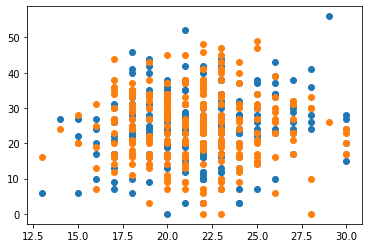

In [41]:
#which game has the most drives
data.groupby(['game_id'])['drive'].max().sort_values(ascending=False)
#is there a correlation between having lots of drives and points?
#count points for both teams
#count drives for both teams
#do linreg
data.groupby(['game_id','posteam'])['drive'].max().sort_values(ascending=False)
data.groupby(['game_id', 'home_team', 'away_team'])[['total_home_score', 'total_away_score']].max()
# data['total_home_score']
# data.groupby(['game_id', 'home_team', 'away_team'])[['total_away_score']]
data.groupby(['game_id', 'home_team', 'away_team'])[['drive']]
data.groupby(['game_id'])[['home_team', 'away_team', 'drive']].max()
home = data.groupby(['game_id'])[['home_team', 'drive', 'total_home_score']].max()
away = data.groupby(['game_id'])[['away_team', 'drive', 'total_away_score']].max()
plt.scatter(home[['drive']], home['total_home_score'])
plt.scatter(away[['drive']], away['total_away_score'])

Model slope:     0.3352878056833272
Model intercept: 17.433109471962307
Model slope:     0.04439058431569704
Model intercept: 23.687185874972798


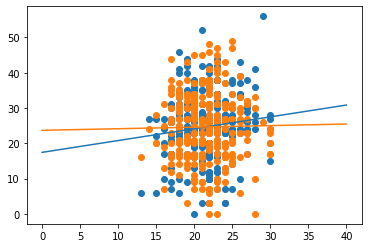

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = home[['drive']]
y = home['total_home_score']
model.fit(X, y)

xfit = np.linspace(0, 40, 10)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(xfit[:, np.newaxis], yfit)
plt.scatter(X, y)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

model2 = LinearRegression(fit_intercept=True)

X2 = away[['drive']]
y2 = away['total_away_score']
model2.fit(X2, y2)

xfit2 = np.linspace(0, 40, 10)
yfit2 = model2.predict(xfit2[:, np.newaxis])

plt.plot(xfit2[:, np.newaxis], yfit2)
plt.scatter(X2, y2)

print("Model slope:    ", model2.coef_[0])
print("Model intercept:", model2.intercept_)

- Home teams appear to score more when they have more drives in a game
- No such correlation for away teams.
- ehhh

2021-09-08 How many yards of passing/rushing does each team have?
- regular season. Groupby postteam&play_type. sum yards gained
- check if passing yards ==0 when play_type = pass


In [49]:
group = data.groupby(['posteam', 'play_type'])
results = group[['passing_yards', 'rushing_yards']].sum()
results = group[['yards_gained']].sum()
# results.loc['WAS']
results[results.loc['play_type'] == 'no_play']

KeyError: 'play_type'

In [55]:
data['drive']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
36676    25.0
36677    25.0
36678    25.0
36679    25.0
36680    25.0
Name: drive, Length: 36681, dtype: float64

In [ ]:
#drop play_type =='no_play'
#select each team's total rushing yards


In [57]:
# From Paul H
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})
df

,state,office_id,sales
0,CA,1,405711
1,WA,2,535829
2,CO,3,217952
3,AZ,4,252315
4,CA,5,982371
5,WA,6,459783
6,CO,1,404137
7,AZ,2,222579
8,CA,3,710581
9,WA,4,548242


In [65]:
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
state_office
state_pcts = state_office.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# state_office.groupby(level=0)
state_pcts
#group by level 1 means group by the second-level index office_id. see from result that sales of office_id 2 in arizona is 30% of total office-ide 2 sales
# state_office.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

sales
state office_id           
AZ    2          29.348187
      4          31.517431
      6          64.512347
CA    1          50.097179
      3          76.527275
      5          67.427236
CO    1          49.902821
      3          23.472725
      5          32.572764
WA    2          70.651813
      4          68.482569
      6          35.487653

In [73]:
#find average EPA per play per team in the regular season
#don't use drive fro the moment
data.groupby(['posteam', 'drive', 'down','play_type'])[['epa']].mean()
data.groupby(['posteam', 'down','play_type'])[['epa']].mean()
yards_by_down_playtype = data.groupby(['posteam', 'down','play_type'])[['yards_gained']].sum()
yards_by_down_playtype / yards_by_down_playtype.groupby(level=[0, 1]).transform('sum')

yards_gained
posteam down play_type              
ARI     1.0  no_play        0.000000
             pass           0.645522
             run            0.354478
        2.0  no_play        0.000000
             pass           0.743313
...                              ...
WAS     3.0  pass           0.835888
             run            0.164112
        4.0  no_play        0.000000
             pass           0.920635
             run            0.079365

[383 rows x 1 columns]

In [91]:
#check whether for any down, any team has rush epa > pass epa
avg_epa = data.groupby(['posteam', 'down','play_type'])[['epa']].mean()
avg_epa
#drop no_play
avg_epa = data[data['play_type'].isin(['pass', 'run'])]
# avg_epa['diff'] = avg_epa.diff().abs()
avg_epa = avg_epa.groupby(['posteam', 'down','play_type'])[['epa']].mean()
avg_epa.loc['ARI']
# avg_epa['diff'] = avg_epa.diff().abs()
# avg_epa.diff().abs()

epa
down play_type          
1.0  pass       0.135192
     run       -0.088148
2.0  pass       0.136822
     run       -0.027852
3.0  pass      -0.130920
     run        0.193018
4.0  pass       0.911989
     run        1.372240

In [90]:
avg_epa.diff(-1).loc['ARI']

epa
down play_type          
1.0  pass       0.223340
     run       -0.224971
2.0  pass       0.164674
     run        0.103068
3.0  pass      -0.323938
     run       -0.718971
4.0  pass      -0.460252
     run        1.162049

In [74]:
yards_by_down_playtype.loc['ARI']

yards_gained
down play_type              
1.0  no_play             0.0
     pass             1903.0
     run              1045.0
2.0  no_play             0.0
     pass             1445.0
     run               499.0
3.0  no_play             0.0
     pass              885.0
     run               206.0
4.0  no_play             0.0
     pass              104.0
     run                86.0

In [ ]:
#any team, any down where pass epa < run epa?


In [53]:
data.iloc[0,:]

play_id                            54
game_id                2020_01_ARI_SF
old_game_id                2020091311
home_team                          SF
away_team                         ARI
                            ...      
xyac_median_yardage               2.0
xyac_success                 0.619306
xyac_fd                      0.239695
xpass                        0.515058
pass_oe                     48.494154
Name: 0, Length: 372, dtype: object

In [20]:
#analysis
qbs = data.groupby(['passer','posteam'], as_index=False).agg({'qb_epa':'mean',
                                                              'cpoe':'mean',
                                                              'play_id':'count'})

In [21]:
#Filter to players with 200 or more dropbacks
# qbs = qbs.loc[qbs.play_id>199]
qbs = qbs.loc[qbs.play_id>10] # for this week
qbs

,passer,posteam,qb_epa,cpoe,play_id
0,A.Dalton,CHI,-0.227844,-2.375338,43
1,Aa.Rodgers,GB,-0.433961,-7.546788,33
2,B.Mayfield,CLE,0.312079,14.246785,32
3,B.Roethlisberger,PIT,0.079052,-10.494156,38
4,C.Wentz,IND,0.059147,1.080687,47
5,D.Jones,NYG,0.025752,-4.226024,44
6,D.Prescott,DAL,0.222191,6.705825,69
7,J.Allen,BUF,-0.124176,-3.891461,61
8,J.Burrow,CIN,0.202299,11.101112,32
10,J.Garoppolo,SF,0.756341,6.228279,26


In [22]:
#Sort in descending order by EPA 
qbs.sort_values('qb_epa', ascending=False, inplace=True)
#Round to two decimal places where appropriate
qbs = qbs.round(2)
#Rename columns
qbs.columns = ['Player','Team','EPA per Dropback','CPOE','Dropbacks']

In [25]:
qbs.head()
qbs
qbs.reset_index(drop=True, inplace=True)
qbs.head()

,Player,Team,EPA per Dropback,CPOE,Dropbacks
0,J.Winston,NO,0.85,10.63,24
1,J.Garoppolo,SF,0.76,6.23,26
2,M.Stafford,LA,0.61,8.26,28
3,T.Bridgewater,DEN,0.60,15.42,41
4,P.Mahomes,KC,0.51,15.67,45


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Model slope:     0.008359300679300406
Model intercept: -3.486769320860283


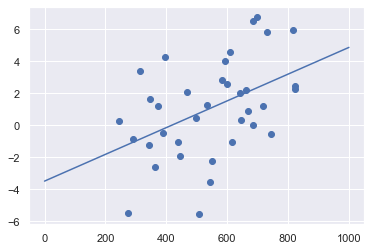

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = qbs[['Dropbacks']]
y = qbs['CPOE']
model.fit(X, y)

xfit = np.linspace(0, 1000, 10)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(xfit[:, np.newaxis], yfit)
plt.scatter(X, y)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [29]:
rush_epa = data.epa.loc[data.play_type=='run']
pass_epa = data.epa.loc[data.play_type=='pass']

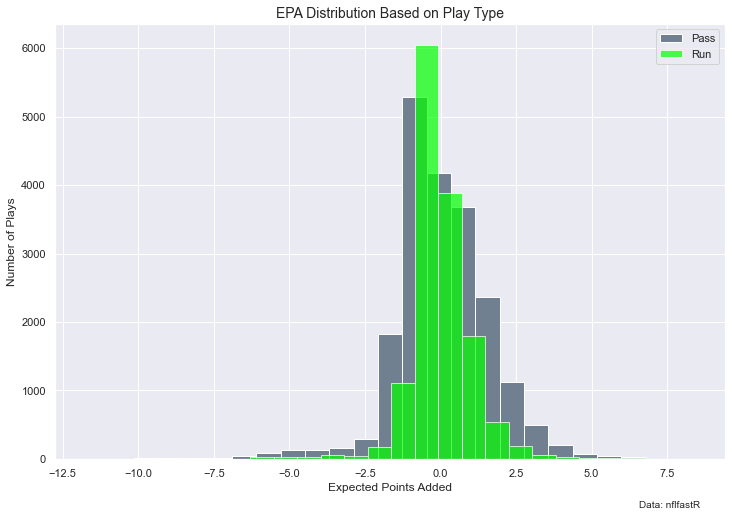

In [30]:
#Create figure and enter in a figsize
plt.figure(figsize=(12,8))

#Place a histogram on the figure with the EPA of all pass plays
#Bins are how many groupings or buckets the data will be split into
#Assign a label for the legend and choose a color
plt.hist(pass_epa, bins=25, label='Pass', color='slategrey')

#Place a second histogram this time for rush plays, 
#The alpha < 1 will make this somewhat transparent
plt.hist(rush_epa, bins=25, label='Run', alpha=.7, color='lime')

#Add labels and title
plt.xlabel('Expected Points Added',fontsize=12)
plt.ylabel('Number of Plays',fontsize=12)
plt.title('EPA Distribution Based on Play Type',fontsize=14)

#Add source, the first two numbers are x and y 
#coordinates as a decimal of the whole image
plt.figtext(.8,.04,'Data: nflfastR', fontsize=10)

#Add a legend
plt.legend()

#Save the figure as a png
plt.savefig('epa_dist.png', dpi=400)

In [31]:
#Create dataframe of just plays in neutral situations
neutral_situation = data.loc[(data.down<3) & (data.half_seconds_remaining>120) &
                             (data.wp>=.2) & (data.wp<=.8)]
                             
#Groupby team game, taking the average of the 'pass' column
#Pass column = 1 when the play call is a pass and 0 when the play call is a run
pass_rates = neutral_situation.groupby(['game_id','posteam'])[['pass']].mean()

#Add a new column to pass rates dataframe for the EPA per dropback
#Filter to pass plays and groupby the same game_id and posteam
pass_rates['epa'] = neutral_situation.loc[neutral_situation['pass']==1].groupby(
    ['game_id','posteam'])[['epa']].mean()

pass_rates.reset_index(inplace=True)                     

In [32]:
x = pass_rates['pass']
y = pass_rates.epa

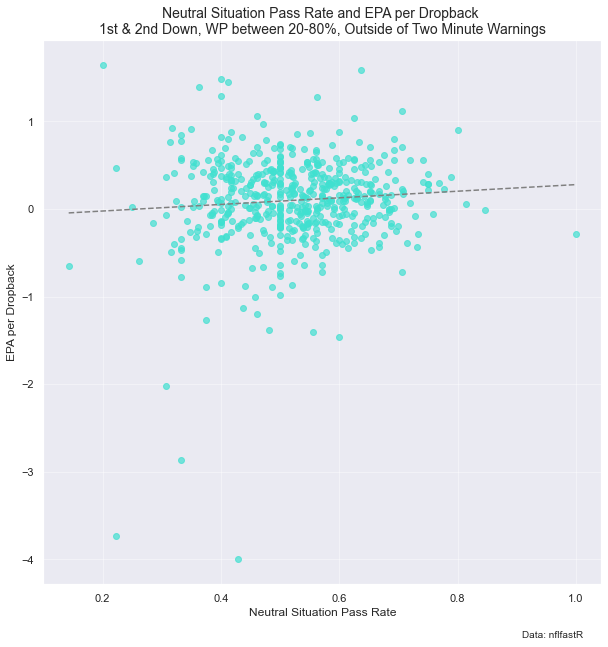

In [33]:
#Create figure and enter in a figsize
plt.figure(figsize=(10,10))

#Make a scatter plot with neutral situation pass rate on the x-axis, EPA per dropback on the y
plt.scatter(x, y, alpha=.7, color='turquoise')

#Create line of best fit
#Linestyle gives a dashed line
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
         color='grey', linestyle='--')

#Add grid lines
plt.grid(zorder=0, alpha=.4)

#Add labels and title
plt.xlabel('Neutral Situation Pass Rate', fontsize=12)
plt.ylabel('EPA per Dropback', fontsize=12)
plt.title('Neutral Situation Pass Rate and EPA per Dropback \n' \
          '1st & 2nd Down, WP between 20-80%, Outside of Two Minute Warnings',fontsize=14)

#Add source, the first two numbers are x and y 
#coordinates as a decimal of the whole image
plt.figtext(.79, .05, 'Data: nflfastR', fontsize=10)

#Save the figure as a png
plt.savefig('ns_rates.png', dpi=400)

In [34]:
data = load_data(2020)

In [35]:
data.head()
data.columns
len(data.home_team.unique()) #32 teams


32

In [36]:
#sort teams by avg expected offensive epa per play
team_epa =  data.groupby('posteam')[['epa']].mean().sort_values('epa', ascending=False)
team_epa.loc['ARI']

epa    0.017035
Name: ARI, dtype: float64

In [37]:
data.groupby(['receiver','posteam'])[['play_id']].count()#.sort_values('play_id', ascending= False)
data.groupby(['receiver','posteam'])[['play_id']].count().reset_index()

,receiver,posteam,play_id
0,A.Abdullah,MIN,11
1,A.Armah,CAR,10
2,A.Auclair,TB,1
3,A.Brewer,TEN,1
4,A.Brown,TB,76
...,...,...,...
533,W.Snead,BAL,57
534,Z.Ertz,PHI,74
535,Z.Jones,LV,20
536,Z.Moss,BUF,24


In [21]:
data.groupby(['receiver','posteam'], as_index=False)[['play_id']].count()

,index,receiver,posteam,play_id
0,0,A.Abdullah,MIN,11
1,1,A.Armah,CAR,10
2,2,A.Auclair,TB,1
3,3,A.Brewer,TEN,1
4,4,A.Brown,TB,76
...,...,...,...,...
533,533,W.Snead,BAL,57
534,534,Z.Ertz,PHI,74
535,535,Z.Jones,LV,20
536,536,Z.Moss,BUF,24


In [23]:
data.groupby(['rusher','posteam'], as_index=False).agg({'rushing_yards':'mean', 
                                                        'play_id':'count',
                                                        'epa':'sum'})

,rusher,posteam,rushing_yards,play_id,epa
0,A.Abdullah,MIN,5.250000,8,1.899271
1,A.Armah,CAR,1.500000,6,-0.635098
2,A.Bars,CHI,0.000000,1,-1.168043
3,A.Brown,TB,6.666667,3,0.587758
4,A.Cole,LV,0.000000,1,-0.556390
...,...,...,...,...,...
381,V.Jefferson,LA,-1.000000,1,-0.773388
382,W.Fuller,HOU,0.000000,1,-0.860770
383,W.Gallman Jr.,NYG,4.639456,150,-0.003412
384,Z.Ertz,PHI,NaN,1,-0.947000


Below is an incomplete list of frquently used columns:

- posteam - the offensive team (possesion team)
- defteam - the defensive team
- game_id - a unique id given to each NFL game
- epa - expected points added
- wp - current win probability of the posteam
- def_wp - current win probability of the defteam
- yardline_100 - number of yards from the opponent's endzone
- passer - the player that passed the ball (on QB scramble plays, the QB is marked as a passer, not rusher)
- rusher - the player that ran the ball
- receiver - the player that was targeted on a pass
- passer_id, rusher_id, receiver_id - the player ID for the passer, rusher, or receiver on a play (useful for joining roster data)
- cpoe - completion percentage over expected on a given pass
- down - down of the play
- play_type - either run, pass, or no_play
- series_success - marked as a 1 if the series becomes successful (first down or a touchdown)

In [36]:
#which rusher average the most yards per play
data.groupby(['rusher', 'posteam'])['rushing_yards'].sum().sort_values(ascending= False)
#### this is a Series so can't input col name into sort_values. Why?

#which team rushes the mostin 2020
data.groupby(['posteam'])['rushing_yards'].sum().sort_values(ascending= False)
#Baltimore rush the most in 2020 with 3.4k yards
data.groupby(['posteam', 'rusher'])['rushing_yards'].sum()['BAL'].sort_values(ascending=False)

rusher
J.Dobbins        890.0
G.Edwards        803.0
L.Jackson        749.0
M.Ingram         299.0
D.Duvernay        70.0
R.Griffin III     69.0
J.Hill            60.0
T.Huntley         22.0
M.Brown           20.0
T.McSorley         8.0
M.Skura            0.0
P.Mekari           0.0
P.Ricard          -1.0
Name: rushing_yards, dtype: float64

In [41]:
qbs = data.groupby(['passer','posteam'], as_index=False).agg({'qb_epa':'mean',
                                                              'cpoe':'mean',
                                                              'play_id':'count'})
qbs = qbs.loc[qbs.play_id>199]
qbs
#Sort in descending order by EPA 
qbs.sort_values('qb_epa', ascending=False, inplace=True)

#Round to two decimal places where appropriate
qbs = qbs.round(2)

#Rename columns
qbs.columns = ['Player','Team','EPA per Dropback','CPOE','Dropbacks']

In [44]:
qbs.reset_index(drop=True)

,Player,Team,EPA per Dropback,CPOE,Dropbacks
0,A.Rodgers,GB,0.36,6.79,697
1,R.Tannehill,TEN,0.30,2.82,582
2,P.Mahomes,KC,0.29,2.25,822
3,J.Allen,BUF,0.27,5.98,816
4,T.Brady,TB,0.26,2.48,824
5,D.Watson,HOU,0.23,6.50,684
6,R.Fitzpatrick,MIA,0.23,3.38,312
7,P.Rivers,IND,0.22,0.35,644
8,B.Mayfield,CLE,0.21,2.03,642
9,K.Cousins,MIN,0.20,4.58,610


In [63]:
data.loc[(data.home_team=='SEA') & (data.away_team=='ARI')]['result'].unique()
data.groupby('game_id')['result'].unique()
data[data['game_id'].isin(['2020_01_ARI_SF'])].iloc[0].result
#if result <0 then away team wins
#if result > 0 then home team win
#if result = 0 then a draw
results = data.groupby('game_id')[['home_team', 'away_team', 'season_type', 'week', 'result']].first()
results

,home_team,away_team,season_type,week,result
game_id,,,,,
2020_01_ARI_SF,SF,ARI,REG,1,-4
2020_01_CHI_DET,DET,CHI,REG,1,-4
2020_01_CLE_BAL,BAL,CLE,REG,1,32
2020_01_DAL_LA,LA,DAL,REG,1,3
2020_01_GB_MIN,MIN,GB,REG,1,-9
...,...,...,...,...,...
2020_19_LA_GB,GB,LA,POST,19,14
2020_19_TB_NO,NO,TB,POST,19,-10
2020_20_BUF_KC,KC,BUF,POST,20,14


In [64]:
def win(X):
    if X['result'] >0:
        return X['home_team']
    elif X['result'] <0:
        return X['away_team']
    else:
        return 'draw'

# results['winner'] = results.apply(win)
results.apply(win)


KeyError: 'result'